In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
x = np.load("../../../scan_0.npy")
y = np.load("../../../scan_20.npy")

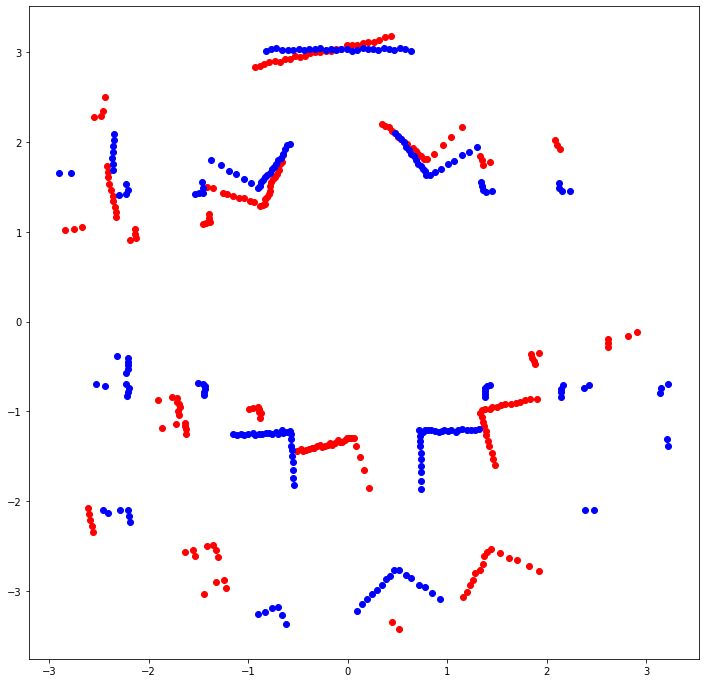

In [58]:
fig = plt.figure(figsize=(12,12))
plt.scatter(x[:,0], x[:,1], c = 'r')
plt.scatter(y[:,0], y[:,1], c = 'b')
plt.show()

In [34]:
def transform(x: np.ndarray, R: np.ndarray, t: np.ndarray) -> np.ndarray:
    """ rotate and move a vector, not sure transform is the right word """
    assert R.shape == (3,3) and t.shape == (3,) and x.shape[1] == 3, "Wrong shapes"
    return (R @ x.T + t[:, None]).T

In [35]:
from sklearn.neighbors import NearestNeighbors

max_iters = 100

R = np.eye(3)
t = np.zeros(3)
distance_threshold = 1.0 # should ideally not be a parameter, makes it hard to tune
tolerance = 0.2  # idk a good value

nbrs = NearestNeighbors(n_neighbors=1, algorithm='kd_tree').fit(y)

# Iterative loop
# for _ in range(max_iters):
#     # Find the nearest neighbors for each point in the moving point cloud x
#     distances, indices = nbrs.kneighbors(self.transform(x,R,t))

#     x_closest, y_closest = self.compute_closest_pairs(x, y, distances, indices, distance_threshold)
    
#     R, t = self.compute_transformation_params(x_closest, y_closest, p=None)
#     x_hat = self.transform(x,R,t)
#     # Convergence check
#     distances, indices = nbrs.kneighbors(x_hat)
#     if np.sum(distances) < tolerance:
#         break

In [36]:
distances, indices = nbrs.kneighbors(transform(x,R,t))

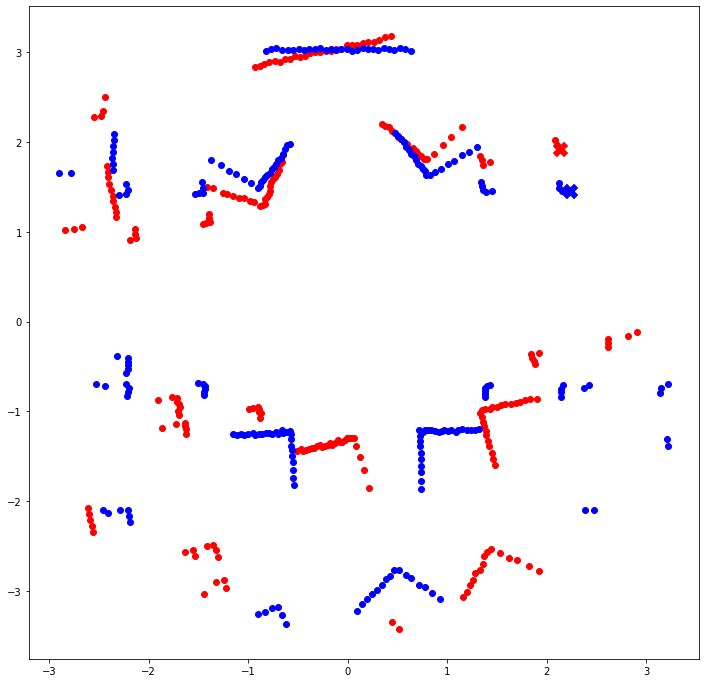

In [78]:
fig = plt.figure(figsize=(12,12))
plt.scatter(x[0,0], x[0,1], marker = 'X', c = 'r', s = 200)
plt.scatter(x[:,0], x[:,1], c = 'r')

plt.scatter(y[0,0], y[0,1], marker = 'X', c = 'b', s = 200)
plt.scatter(y[:,0], y[:,1], c = 'b')

plt.show()